# Content
>AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Complain - 1 if customer complained in the last 2 years <br>
DtCustomer - date of customer’s enrolment with the company <br>
Education - customer’s level of education <br>
Marital - customer’s marital status <br>
Kidhome - number of small children in customer’s household <br>
Teenhome - number of teenagers in customer’s household <br>
Income - customer’s yearly household income <br>
MntFishProducts - amount spent on fish products in the last 2 years <br>
MntMeatProducts - amount spent on meat products in the last 2 years <br>
MntFruits - amount spent on fruits products in the last 2 years <br>
MntSweetProducts - amount spent on sweet products in the last 2 years <br>
MntWines - amount spent on wine products in the last 2 years <br>
MntGoldProds - amount spent on gold products in the last 2 years <br>
NumDealsPurchases - number of purchases made with discount <br>
NumCatalogPurchases - number of purchases made using catalogue <br>
NumStorePurchases - number of purchases made directly in stores <br>
NumWebPurchases - number of purchases made through company’s web site <br>
NumWebVisitsMonth - number of visits to company’s web site in the last month <br>
Recency - number of days since the last purchase <br>
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

In [1]:
import pandas as pd
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



from scipy import stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")

In [3]:
#read 5 first row on data set
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
#sampel 10 rows
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1969,4331,1978,Master,Together,85738.0,0,0,2014-01-23,41,913,26,376,17,26,13,1,3,6,11,1,0,1,1,0,0,0,3,11,0
1398,3421,1968,Master,Divorced,63841.0,0,1,2013-04-21,64,635,15,100,20,7,131,1,9,3,9,6,0,0,0,0,0,0,3,11,0
511,4320,1979,Graduation,Single,60152.0,0,1,2013-03-28,6,325,83,300,86,58,91,1,6,4,12,3,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1290,4808,1956,Graduation,Married,15759.0,0,0,2013-09-05,12,1,2,5,6,0,3,1,1,0,2,7,0,0,0,0,0,0,3,11,0
345,1411,1952,Graduation,Divorced,82623.0,0,0,2013-11-10,58,204,34,204,172,153,173,1,2,9,4,1,0,0,0,0,0,0,3,11,0
1970,6281,1966,Graduation,Divorced,55686.0,0,1,2013-02-14,27,673,0,199,37,47,26,2,6,3,5,4,1,0,0,0,0,0,3,11,0
1557,4037,1976,Graduation,Divorced,31859.0,1,0,2013-06-14,77,3,1,3,8,0,5,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1790,1419,1950,Graduation,Together,34026.0,1,1,2013-08-05,11,18,6,15,12,8,17,3,2,1,3,5,0,0,0,0,0,0,3,11,0
503,5140,1985,PhD,Married,64355.0,1,0,2012-08-24,66,1047,0,140,67,38,153,2,4,3,12,8,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [5]:
#check info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari info data yang dimiliki, tiap kolom telah memiliki tipe data yang sesuai <br>
Pada kolom Income tampaknya terdapat nilai yang missing

In [6]:
#check data missing
100*(df.isnull().sum()/len(df))

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

kolom income memiliki persentase missing sebesar 1%

In [7]:
#check inconsistent data
for col in df.columns:
    print(f'unique value for {col}')
    print(f'{df[col].unique()}')
    print("=="*20)

unique value for ID
[5524 2174 4141 ... 7270 8235 9405]
unique value for Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
unique value for Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
unique value for Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
unique value for Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
unique value for Kidhome
[0 1 2]
unique value for Teenhome
[0 1 2]
unique value for Dt_Customer
['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'


Dari hasil observasi nilai unique tiap colom : <br>
1.Pada kolom marital_status, penulisan status tidak konsistent sehingga perlu diperbaiki penulisan format pada kolom ini. **Widow** == **Divorced**, **Together** == **Married**, **Alone** == **Single**. untuk **Absurd** dan **Yolo** perlu di lakukan investigasi terlebih dahulu untuk menentukan akan dijadikan penulisan format seperti apa. <br>
2.Kolom Z_CostContact dan Z_revenue hanya memiliki 1 nilai sehingga dapat diabaikan.

In [8]:
#drop kolom yang tidak diperlukan
df = df.drop(["Z_CostContact","Z_Revenue"],axis=1)
df.shape

(2240, 27)

In [9]:
#Missing Value Handling
#imputasi median
df["Income"] = df["Income"].fillna(df["Income"].median())

<AxesSubplot:>

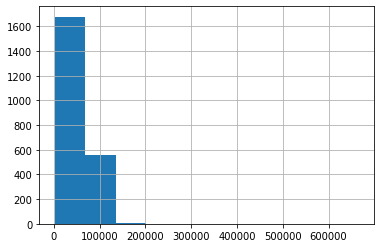

In [10]:
df["Income"].hist()

# Eksploratory Data Analysis

In [11]:
#calculating age and tenure
#Age = reference year - Year_Birth
#Tenure = reference year - year
#reference date = 2022-01-01

import datetime
reference_date = datetime.datetime(2022,1,1)


#convert year birt to datetime
df["Year_Birth"]  = pd.to_datetime(df["Year_Birth"],format="%Y")

#calculating Age
df["Age"] = (reference_date - df["Year_Birth"]).astype("timedelta64[Y]")


#convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])

#calculating tenure
df['Tenure'] = (reference_date - df["Dt_Customer"]).astype("timedelta64[Y]")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65.0,9.0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68.0,7.0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57.0,8.0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38.0,7.0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41.0,7.0


In [12]:
#Feature Engineering
#mendapatkan umur customer yang tercatat saat mereka mendaftar menjadi customer

year = []
for x in df["Dt_Customer"]:
    year.append(str(x).split()[0].split("-")[0])

df["year"] = year

#convert to integer
df["year"] = df['year'].astype("int64")


month = []
for x in df["Dt_Customer"]:
    month.append(str(x).split()[0].split("-")[1])

df["month"] = month

#convert to integer
df["month"] = df['month'].astype("int64")

day = []
for x in df["Dt_Customer"]:
    day.append(str(x).split()[0].split("-")[2])

df["day"] = day

#convert to integer
df["day"] = df['day'].astype("int64")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,day
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,4
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,8
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,21
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,10
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,19


In [13]:
#rata rata jumlah anak permarital status
df.groupby("Marital_Status")["Kidhome","Teenhome","Age"].agg(["sum","mean"])

Kidhome           Teenhome                Age           
                   sum      mean      sum      mean      sum       mean
Marital_Status                                                         
Absurd               0  0.000000        0  0.000000     93.0  46.500000
Alone                3  1.000000        2  0.666667    147.0  49.000000
Divorced            96  0.413793      137  0.590517  12926.0  55.715517
Married            394  0.456019      442  0.511574  45280.0  52.407407
Single             223  0.464583      195  0.406250  24229.0  50.477083
Together           261  0.450000      307  0.529310  31461.0  54.243103
Widow               18  0.233766       49  0.636364   4885.0  63.441558
YOLO                 0  0.000000        2  1.000000     98.0  49.000000

dari data tabel didapatkan informasi: <br>
1.marital status **Absurd**, tidak memiliki anak. sehingga dapat dikategorikan sebagai single. <br>
2.marital status **Alone**, memiliki anak, sehingga dapat dikategorikan sebagai orang yang telah bercerai (Divorced). <br>
3.marital status **Single**, 46% dari populasinya memiliki anak kecil dan 40% dari populasinya juga memiliki anak remaja, sehingga perlu dipisahkan antara single yang belum mempunyai anak dan single yang dapat dikategorikan sebagai kalangan **Divorced**. <br>
4.marital status **Yolo**, memiliki anak remaja, kemungkinan mereka adalah kelompok yang telah married

In [14]:
df.loc[(df["Marital_Status"]=="Absurd"),"Marital_Status"]="Single"
df.loc[(df["Marital_Status"]=="Alone")&((df["Kidhome"]>0)|(df["Teenhome"]>0)),"Marital_Status"]= "Divorced"
df.loc[(df["Marital_Status"]=="Alone")&((df["Kidhome"]==0)|(df["Teenhome"]==0)),"Marital_Status"]= "Single"
df.loc[(df["Marital_Status"]=="Single")&((df["Kidhome"]>0)|(df["Teenhome"]>0)),"Marital_Status"]= "Divorced"
df.loc[(df["Marital_Status"]=="YOLO")&((df["Kidhome"]>0)|(df["Teenhome"]>0)),"Marital_Status"]= "Married"
df.loc[df["Marital_Status"]=="Together",'Marital_Status'] = 'Married'
df.loc[df["Marital_Status"]=="Widow",'Marital_Status'] = 'Divorced'

In [15]:
df["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [16]:
#Summary Statistic
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,day
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.178125,7.973214,2013.028125,6.467411,15.638393
std,3246.662198,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,12.008965,0.683629,0.684554,3.486695,8.790680
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,7.000000,2012.000000,1.000000,1.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,8.000000,2013.000000,3.000000,8.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,8.000000,2013.000000,6.000000,16.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,8.000000,2013.000000,10.000000,23.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,9.000000,2014.000000,12.000000,31.000000


In [17]:
df.describe(include="object")

,Education,Marital_Status
count,2240,2240
unique,5,3
top,Graduation,Married
freq,1127,1446


Dari summary statistics beberapa kolom memiliki outliers, seperti kolom **Age** yang tidak masuk akal yaitu di atas 100 tahun, sehingg perlu di handling

In [18]:
df.describe(percentiles=[0.01,0.25,0.5,0.75,0.9,0.99])

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,day
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.178125,7.973214,2013.028125,6.467411,15.638393
std,3246.662198,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,12.008965,0.683629,0.684554,3.486695,8.790680
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,7.000000,2012.000000,1.000000,1.000000
1%,123.780000,7705.920000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,7.000000,2012.000000,1.000000,1.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,8.000000,2013.000000,3.000000,8.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,8.000000,2013.000000,6.000000,16.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,8.000000,2013.000000,10.000000,23.000000
90%,10203.400000,79800.300000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,89.000000,122.000000,5.000000,8.000000,7.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,9.000000,2014.000000,11.000000,28.000000
99%,11074.610000,94437.680000,2.000000,2.000000,98.000000,1285.000000,172.000000,915.000000,226.220000,177.220000,227.000000,10.000000,11.000000,10.610000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,77.000000,9.000000,2014.000000,12.000000,31.000000


In [19]:
num = df.select_dtypes(include="number").columns
cat = df.select_dtypes(include="object").columns
print(num)
print(cat)

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Tenure', 'year',
       'month', 'day'],
      dtype='object')
Index(['Education', 'Marital_Status'], dtype='object')


In [20]:
num = ['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age'
       ]

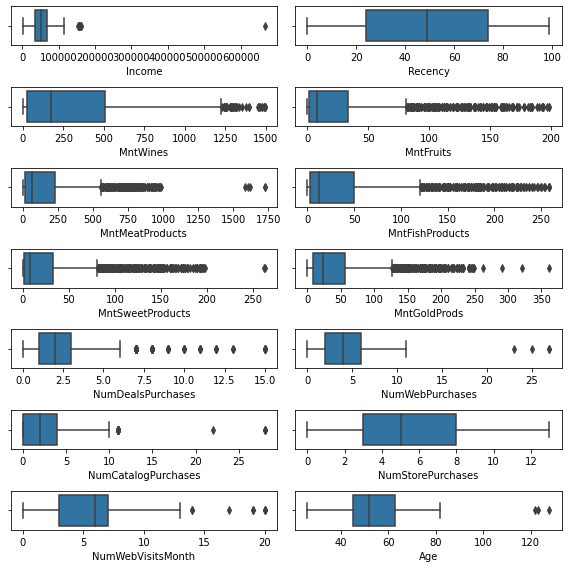

In [21]:
plt.figure(figsize=(8,8))
for x in range(0,len(num)):
    plt.subplot(7,2,x+1)
    sns.boxplot(data=df,x=df[num[x]])
    plt.tight_layout()
plt.show()

In [22]:
#Outliers Handling
def capping_outliers(x):
    x = x.clip(lower=x.quantile(0.01))
    x= x.clip(upper=x.quantile(0.99))
    return(x)

In [23]:
df[num] = df[num].apply(lambda x:capping_outliers(x))

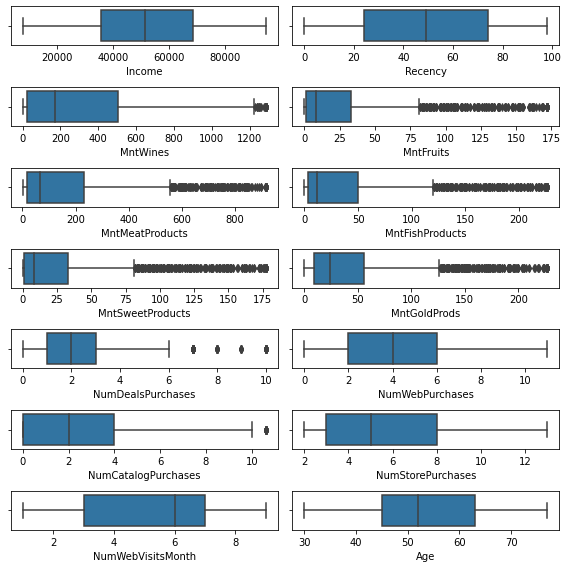

In [24]:
#check again
plt.figure(figsize=(8,8))
for x in range(0,len(num)):
    plt.subplot(7,2,x+1)
    sns.boxplot(data=df,x=df[num[x]])
    plt.tight_layout()
plt.show()

beberapa Outliers telah dibersihkan

Text(0.5, 1.0, 'Perbadingan Customer Yang Menerima Penawaran')

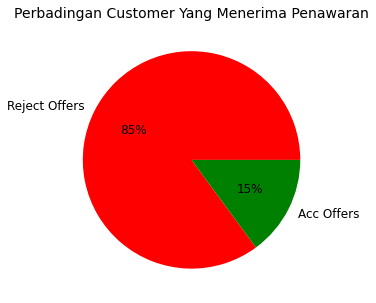

In [25]:
#baseline Model
plt.figure(figsize=(5,5))
plt.pie(df["Response"].value_counts(),labels=["Reject Offers","Acc Offers"],
        colors=['r','g'],autopct= '%1.f%%',textprops={'fontsize':12})
plt.title("Perbadingan Customer Yang Menerima Penawaran",fontsize=14)

In [26]:
df["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

dari baseline model, customer yang menerima tawaran sebanyak 15% atau 336 dari 2240 customer yang ditawarkan

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Tenure', 'year',
       'month', 'day'],
      dtype='object')

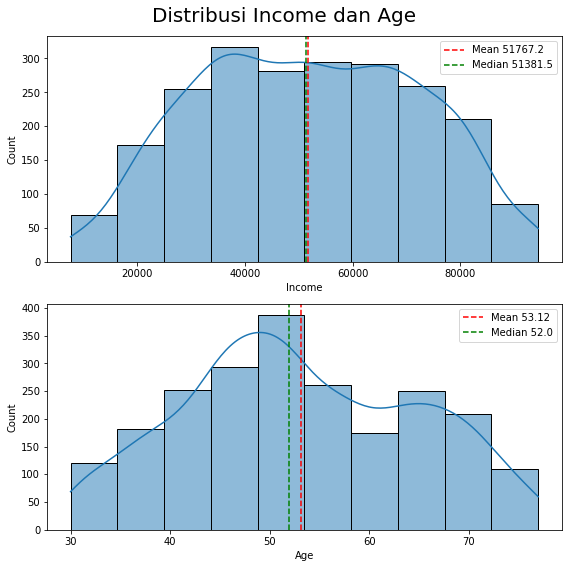

In [28]:
#Histogram Visualisation
num = ['Income','Age']

plt.figure(figsize=(8,8))

for x in range(0,len(num)):
    plt.subplot(2,1,x+1)
    plt.suptitle('Distribusi Income dan Age',fontsize=20)
    sns.histplot(data=df,x=df[num[x]],kde=True,edgecolor='k',bins=10)
    plt.axvline(x=df[num[x]].mean(),color='r',linestyle='--',label=(f'Mean {np.round(df[num[x]].mean(),2)}'))
    plt.axvline(x=df[num[x]].median(),color='g',linestyle='--',label=(f'Median {np.round(df[num[x]].median(),2)}'))
    plt.tight_layout()
    plt.legend()
plt.show()

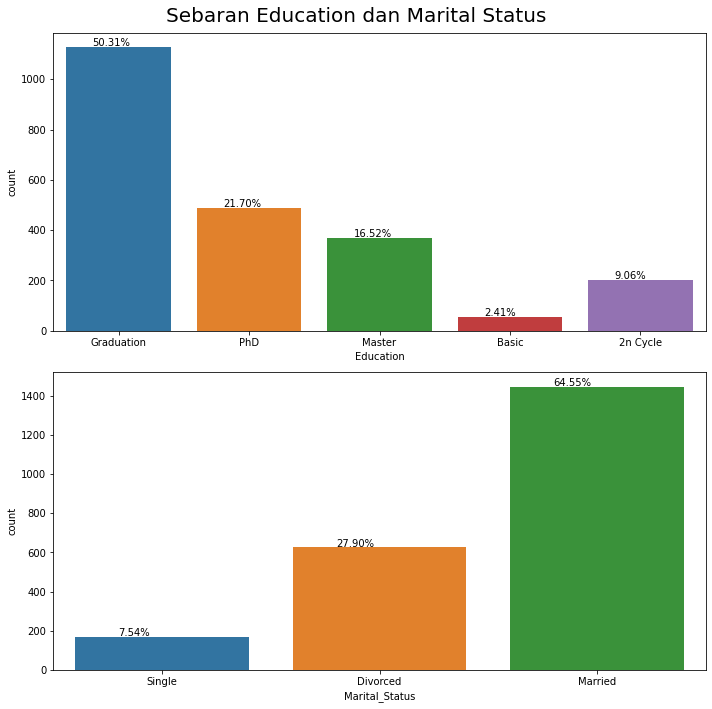

In [29]:
plt.figure(figsize=(10,10))

for x in range(0,len(cat)):
    plt.subplot(2,1,x+1)
    plt.suptitle('Sebaran Education dan Marital Status',fontsize=20)
    sns.countplot(data=df,x=df[cat[x]])
    plt.tight_layout()
    ax=plt.gca()
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/4.,
               height+5,'{:.2f}%'.format(
               100*(height/len(df)),fontsize=15,ha='center',va='bottom'))
plt.show()

# Bivariate

             len  sum      mean
Education                      
PhD          486  101  0.207819
Master       370   57  0.154054
Graduation  1127  152  0.134871
2n Cycle     203   22  0.108374
Basic         54    2  0.037037


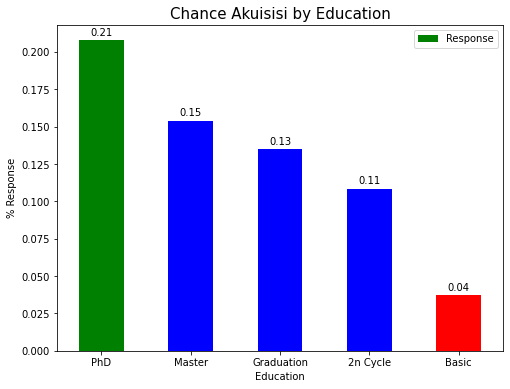

In [30]:
#persentase Response terhadap Edukasi
print(df.groupby('Education')["Response"].agg([len,'sum','mean']).sort_values("mean",ascending=False))
plots=df.groupby('Education')["Response"].mean().sort_values(axis=0,ascending=False).plot(kind='bar',figsize=(8,6),color=['g','b','b','b','r'])
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Chance Akuisisi by Education',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("% Response")
plt.legend()

kalangan **PhD** Memiliki persentase menerima tawaran lebih tinggi yaitu sebesar 20,7%, disusul **Master** sebanyak 15,4% sedangkan persentase menerima tawaran terkecil berada pada kalangan edukasi **Basic**

Text(0.5, 1.0, 'Rata Rata Income Per Edukasi')

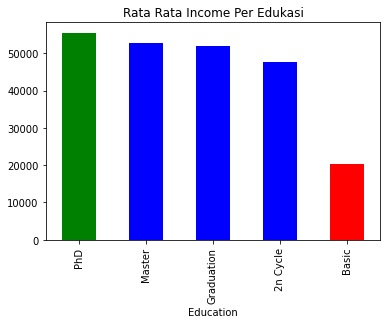

In [31]:
#apakah karena dipengaruhi dengan jumlah pendapatan ?
df.groupby("Education")["Income"].mean().sort_values(ascending=False).plot(kind='bar',color=['g','b','b','b','r'])
plt.title('Rata Rata Income Per Edukasi')

Berdasarkan Edukasi, rata rata pendapatan PhD adalah yang tertinggi, sehingga didapatkan informasi besarnya pendapatan dapat mempengaruhi peluang untuk menerima tawaran

In [32]:
#hubungan antara marital status dengan response
df.groupby("Marital_Status")["Response"].agg([len,'sum','mean']).sort_values('mean',ascending=False)

,len,sum,mean
Marital_Status,,,
Single,169,66,0.390533
Divorced,625,109,0.174400
Married,1446,159,0.109959


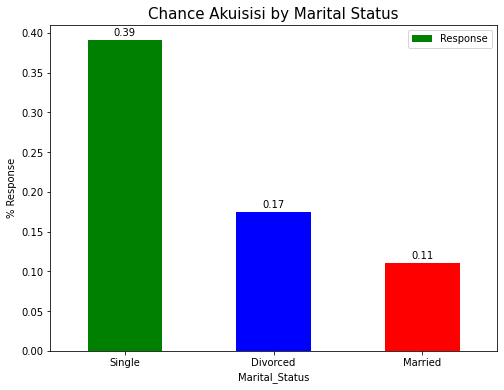

In [33]:
#hubungan antara marital status dengan response
plots = df.groupby("Marital_Status")["Response"].mean().sort_values(axis=0,ascending=False).plot(kind='bar',color=['g','b','r'],
                                                                                                figsize=(8,6))
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Chance Akuisisi by Marital Status',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("% Response")
plt.legend()

Text(0.5, 1.0, 'Rata Rata Income Per Marital Status')

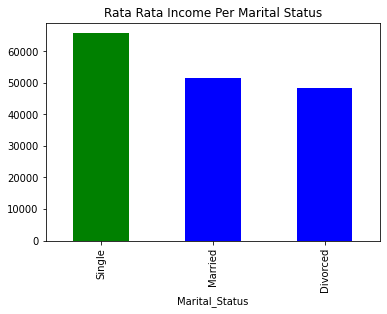

In [34]:
#bagaimana rata rata income tiap dengan marital status
df.groupby("Marital_Status")["Income"].mean().sort_values(ascending=False).plot(kind='bar',color=['g','b','b','b','r'])
plt.title('Rata Rata Income Per Marital Status')

dari segi income, marital status **Single** memiliki tingkat rata rata Income yang lebih tinggi

Text(0.5, 1.0, 'Chance Akuisisi Terhadap Marital Status dan Tingkat Edukasi')

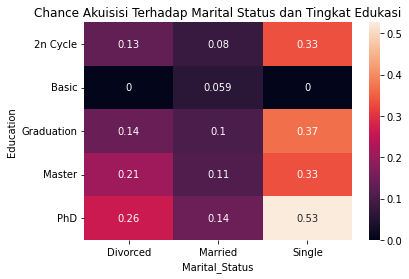

In [35]:
#persentase martial_status dengan education terhadap response
sns.heatmap(pd.pivot_table(df,index='Education',columns='Marital_Status',values='Response',
              aggfunc='mean'),annot=True)
plt.title("Chance Akuisisi Terhadap Marital Status dan Tingkat Edukasi")

berdasarkan hubungan antara marital status dan tingkat edukasi, single dengan selain tingkat edukasi **Basic** memiliki persentase yang tinggi untuk menerima tawaran, untuk kalangan married hanya tingkat edukasi **PhD** saja yang memiliki persentase yang tinggi, untuk Divorced, tingkat edukasi **Master dan PhD** memiliki persentase yang cukup tinggi

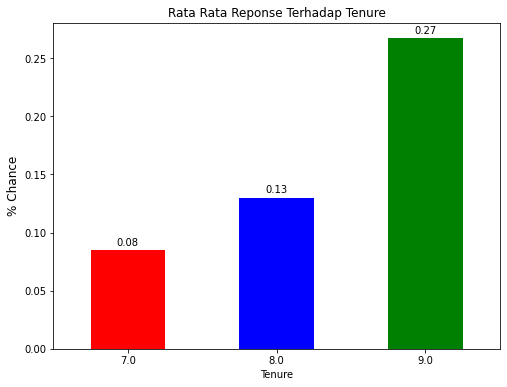

In [36]:
#bagaimana pengaruh Tenure terhadap tingkat response ?
plots = df.groupby('Tenure')["Response"].mean().plot(kind="bar",color=['r','b','g'],figsize=(8,6))
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Rata Rata Reponse Terhadap Tenure",fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('% Chance',fontsize=12);

In [37]:
df.groupby('Tenure').agg({"Response":[len,"sum","mean"]})

Response               
            len  sum      mean
Tenure                        
7.0         554   47  0.084838
8.0        1192  155  0.130034
9.0         494  132  0.267206

<AxesSubplot:xlabel='Education'>

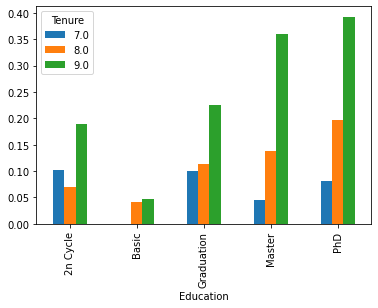

In [38]:
pd.pivot_table(df,columns=df['Tenure'],index=df['Education'],values='Response').plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status'>

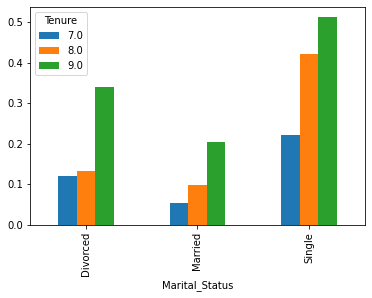

In [39]:
pd.pivot_table(df,columns=df['Tenure'],index=df['Marital_Status'],values='Response').plot(kind='bar')

pada tenure 9, persentase response sebesar 26,7% atau 132 dari 494 customer. <br>
pada tenure 8, persentase response sebesar 13% atau 155 dari 1192. <br>
pada tenure 7, persentase repsonse sebesar 8% atau 47 dari 554

In [40]:
df['Age'].min(),df["Age"].max()

(30.0, 77.0)

In [41]:
age_bin = []

for x in df["Age"]:
    if x<=40:
        age_bin.append("30-40")
    elif x<=50:
        age_bin.append("40-50")
    elif x<=60:
        age_bin.append("50-60")
    else:
        age_bin.append(">60")
        
df["Age_group"] = age_bin

In [42]:
pd.pivot_table(df,index="Age_group",values="Response",aggfunc=[len,"sum"])

,len,sum
,Response,Response
Age_group,,
30-40,346,71
40-50,654,85
50-60,585,81
>60,655,97


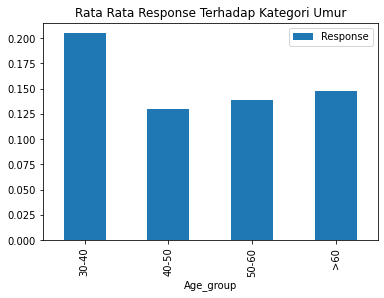

In [43]:
pd.pivot_table(df,index="Age_group",values="Response",aggfunc="mean").plot(kind="bar")
plt.title("Rata Rata Response Terhadap Kategori Umur",fontsize=12);

Persentase tertinggi berada pada kelompok umur 30-40 tahun dengan persentase sebesar 20% atau 71 orang dari 346

<AxesSubplot:xlabel='Age_group'>

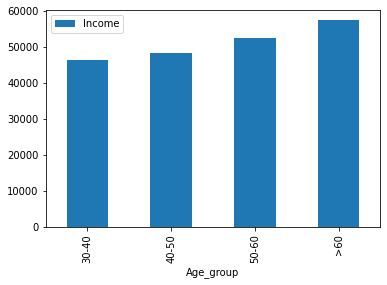

In [44]:
pd.pivot_table(df,index="Age_group",values="Income",aggfunc="mean").plot(kind="bar")

In [45]:
#analisis trend per tahun
df.groupby("year").agg({"Response":[len,'sum','mean']})

Response               
          len  sum      mean
year                        
2012      494  132  0.267206
2013     1189  154  0.129521
2014      557   48  0.086176

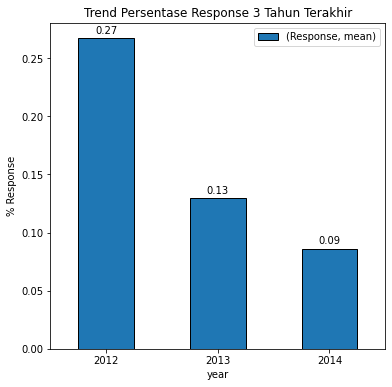

In [46]:
plots = df.groupby("year").agg({"Response":['mean']}).plot(kind='bar',figsize=(6,6),edgecolor='k')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Trend Persentase Response 3 Tahun Terakhir",fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("% Response")
plt.legend()

<AxesSubplot:xlabel='year', ylabel='count'>

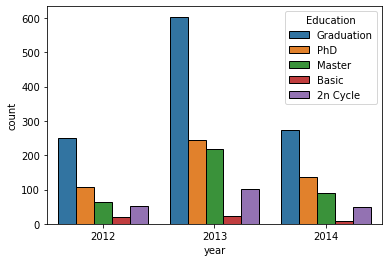

In [47]:
sns.countplot(data=df,x='year',hue='Education',edgecolor='k')

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,day,Age_group
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172.0,88.0,88,3,8,10.0,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,4,>60
1,2174,1954-01-01,Graduation,Divorced,46344.0,1,1,2014-03-08,38,11,1,6,2.0,1.0,6,2,1,1.0,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,8,>60
2,4141,1965-01-01,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111.0,21.0,42,1,8,2.0,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,21,50-60
3,6182,1984-01-01,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10.0,3.0,5,2,2,0.0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,10,30-40
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46.0,27.0,15,5,5,3.0,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,19,40-50


In [49]:
df['Total_Dependents'] = df['Kidhome'] + df['Teenhome']

In [50]:
income_per_dependents = []
for x,y in zip(df['Income'],df['Total_Dependents']):
    if y ==0:
        income_per_dependents.append(x)
    else:
        income_per_dependents.append(x/y)

In [51]:
df['Income_per_Dependents'] = income_per_dependents

In [52]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,day,Total_Dependents,Income_per_Dependents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,51767.195893,0.444196,0.506250,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,2.299554,4.058929,2.630371,5.806696,5.286607,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.118750,7.973214,2013.028125,6.467411,15.638393,0.950446,46840.617647
std,3246.662198,20614.112834,0.538398,0.544538,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,1.800700,2.642307,2.752313,3.226959,2.296277,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.689759,0.683629,0.684554,3.486695,8.790680,0.751803,23470.724701
min,0.000000,7705.920000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,7.000000,2012.000000,1.000000,1.000000,0.000000,3852.960000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,8.000000,2013.000000,3.000000,8.000000,0.000000,25385.500000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,8.000000,2013.000000,6.000000,16.000000,1.000000,44971.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,8.000000,2013.000000,10.000000,23.000000,1.000000,67421.750000
max,11191.000000,94437.680000,2.000000,2.000000,98.000000,1285.000000,172.000000,915.000000,226.220000,177.220000,227.000000,10.000000,11.000000,10.610000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,9.000000,2014.000000,12.000000,31.000000,3.000000,94437.680000


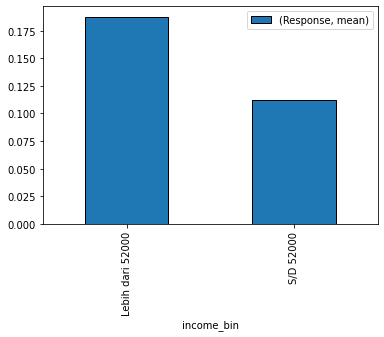

In [53]:
income_bin = []
for x in df['Income']:
    if x<=52000:
        income_bin.append('S/D 52000')
    else:
        income_bin.append('Lebih dari 52000')
df['income_bin'] = income_bin
df.groupby('income_bin').agg({'Response':['mean']}).plot(kind='bar',edgecolor='k')
plt.legend()

Text(0.5, 1.0, 'Chance Akuisisi Terhadap Income dan Education')

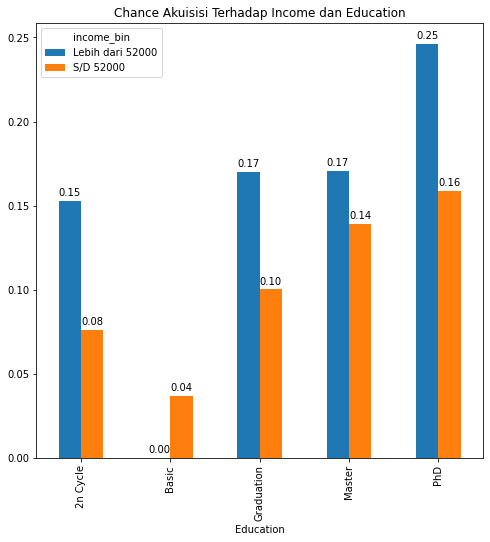

In [54]:
#persentase martial_status dengan education terhadap response
plots= pd.pivot_table(df,index='Education',columns='income_bin',values='Response',
              aggfunc='mean').plot(kind='bar',figsize=(8,8))
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Chance Akuisisi Terhadap Income dan Education")

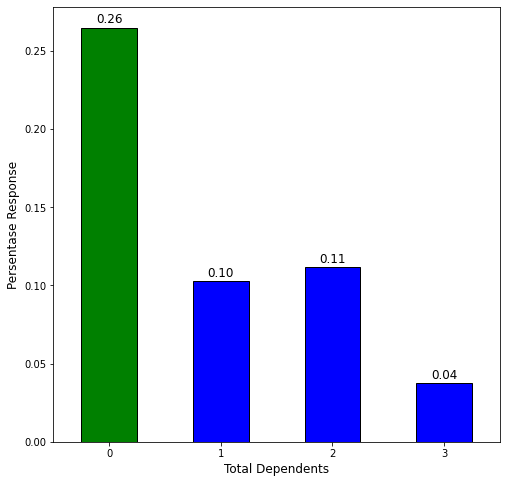

In [55]:
plots = df.groupby("Total_Dependents")['Response'].mean().plot(kind='bar',figsize=(8,8),edgecolor='k',color=['g','b','b','b'])

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Total Dependents',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12);

In [56]:
recency_bin = []

for x in df['Recency']:
    if x<=10:
        recency_bin.append('0-10 Hari')
    elif x<=20:
        recency_bin.append('11-20 hari')
    elif x<=30:
        recency_bin.append('21-30 Hari')
    else:
        recency_bin.append('diatas 30 Hari')

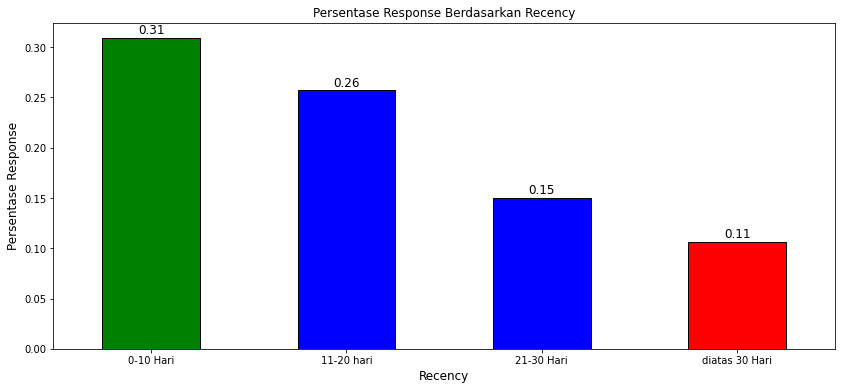

In [57]:
df['recency_bin'] = recency_bin

plots = df.groupby('recency_bin')['Response'].mean().plot(kind='bar',figsize=(14,6),
                                                          color=['g','b','b','r'],
                                                         title='Persentase Response Berdasarkan Recency',edgecolor='k')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Recency',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12);

Berdasarkan dari hari terakhir membeli, pembelian terakhir rentang waktu 0-10 hari memberikan chance yang sebesar 31% untuk customer menerima tawaran market, ketika rentang waktu semakin besar memberikan chance yang semakin kecil untuk customer menerima tawaran market. 

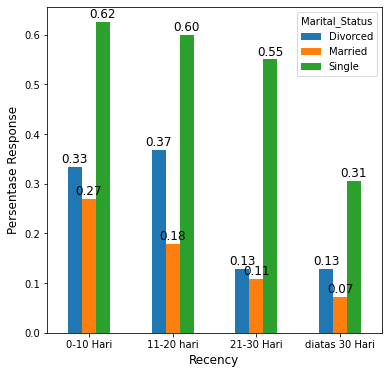

In [58]:
plots = pd.pivot_table(df,columns='Marital_Status',index='recency_bin',values='Response',aggfunc='mean').plot(kind='bar',
                                                                                                             figsize=(6,6))
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Recency',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12);

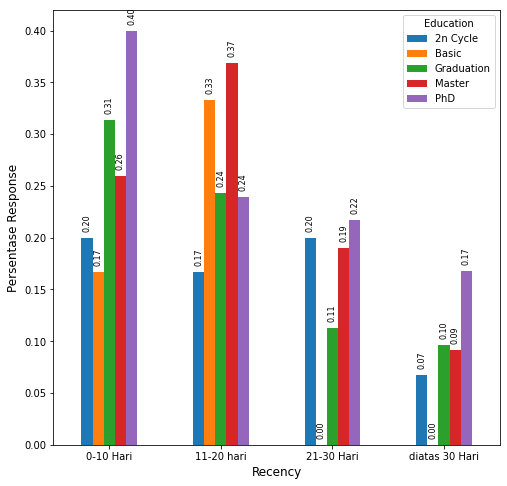

In [59]:
plots = pd.pivot_table(df,columns='Education',index='recency_bin',values='Response',aggfunc='mean').plot(kind='bar',
                                                                                                             figsize=(8,8),
                                                                                                        width=0.5)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 15),
                   textcoords='offset points',
                  rotation=90)
plt.xticks(rotation=0)
plt.xlabel('Recency',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12);

Text(0, 0.5, 'Persentase Response')

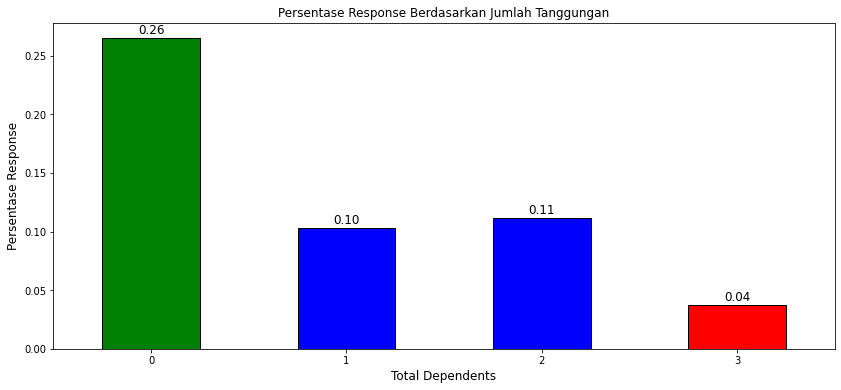

In [60]:
plots = df.groupby('Total_Dependents')['Response'].mean().plot(kind='bar',figsize=(14,6),
                                                          color=['g','b','b','r'],
                                                         title='Persentase Response Berdasarkan Jumlah Tanggungan',
                                                              edgecolor='k')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Total Dependents',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12)

Text(0, 0.5, 'Persentase Response')

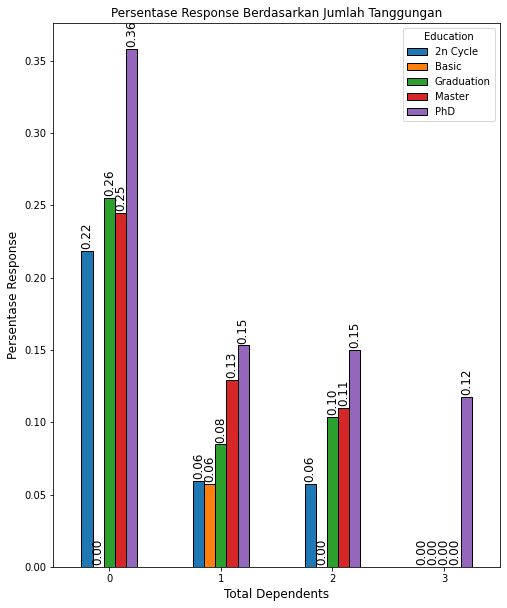

In [61]:
plots = pd.pivot_table(df,index='Total_Dependents',columns='Education',values='Response',
                       aggfunc='mean').plot(kind='bar',figsize=(8,10),
                                            title='Persentase Response Berdasarkan Jumlah Tanggungan',
                                                              edgecolor='k')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 15),
                   textcoords='offset points',
                  rotation=90)
plt.xticks(rotation=0)
plt.xlabel('Total Dependents',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12)

Text(0, 0.5, 'Persentase Response')

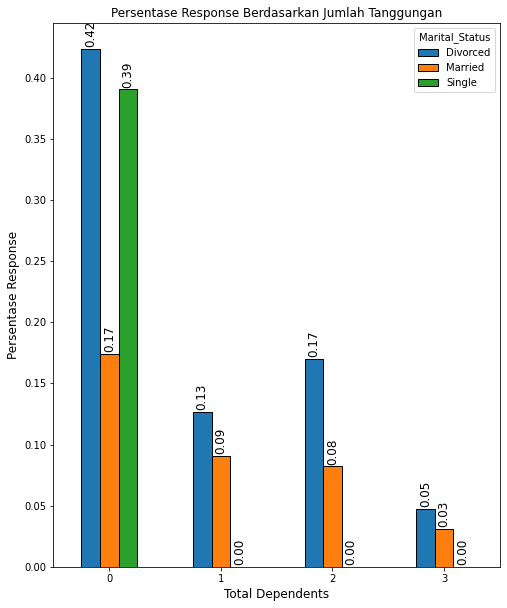

In [62]:
plots = pd.pivot_table(df,index='Total_Dependents',columns='Marital_Status',values='Response',
                       aggfunc='mean').plot(kind='bar',figsize=(8,10),
                                            title='Persentase Response Berdasarkan Jumlah Tanggungan',
                                                              edgecolor='k')
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 15),
                   textcoords='offset points',
                  rotation=90)
plt.xticks(rotation=0)
plt.xlabel('Total Dependents',fontsize=12)
plt.ylabel('Persentase Response',fontsize=12)

Customer yang tidak memiliki tanggungan memiliki chance 26% menerima tawaran market lebih besar dibandingkan customer yang memiliki tanggungan, chance terkecil ketika customer memiliki jumlah tanggungan lebih dari 2 dengan chance sebesar 4%

<AxesSubplot:xlabel='month', ylabel='year'>

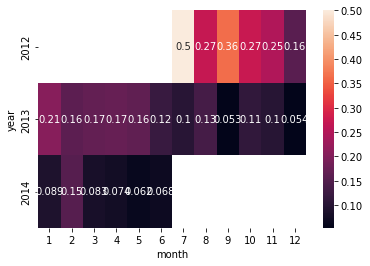

In [63]:
sns.heatmap(pd.pivot_table(df,index='month',columns='year',values='Response',
              aggfunc='mean').T,annot=True)

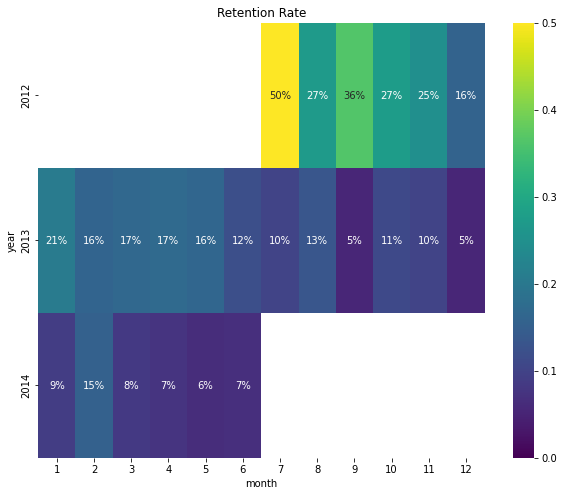

In [64]:
plt.figure(figsize=(10,8))
plt.title("Retention Rate")
sns.heatmap(data=pd.pivot_table(df,columns='month',index='year',values='Response'),
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="viridis")
plt.show()

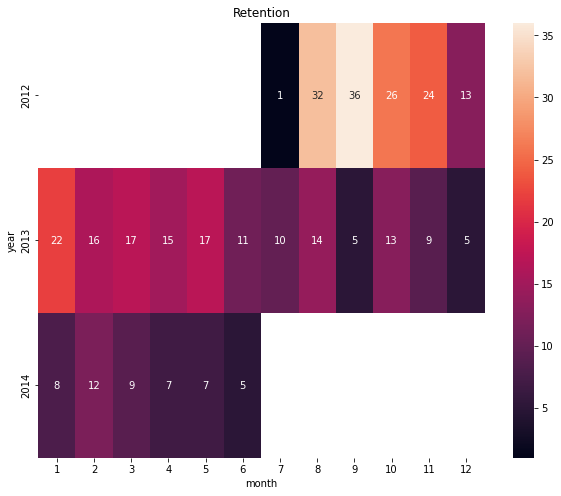

In [65]:
plt.figure(figsize=(10,8))
plt.title("Retention")
sns.heatmap(data=pd.pivot_table(df,columns='month',index='year',values='Response',aggfunc='sum'),
           annot=True,
           vmin=1,
           vmax=36,
           )
plt.show()

<AxesSubplot:>

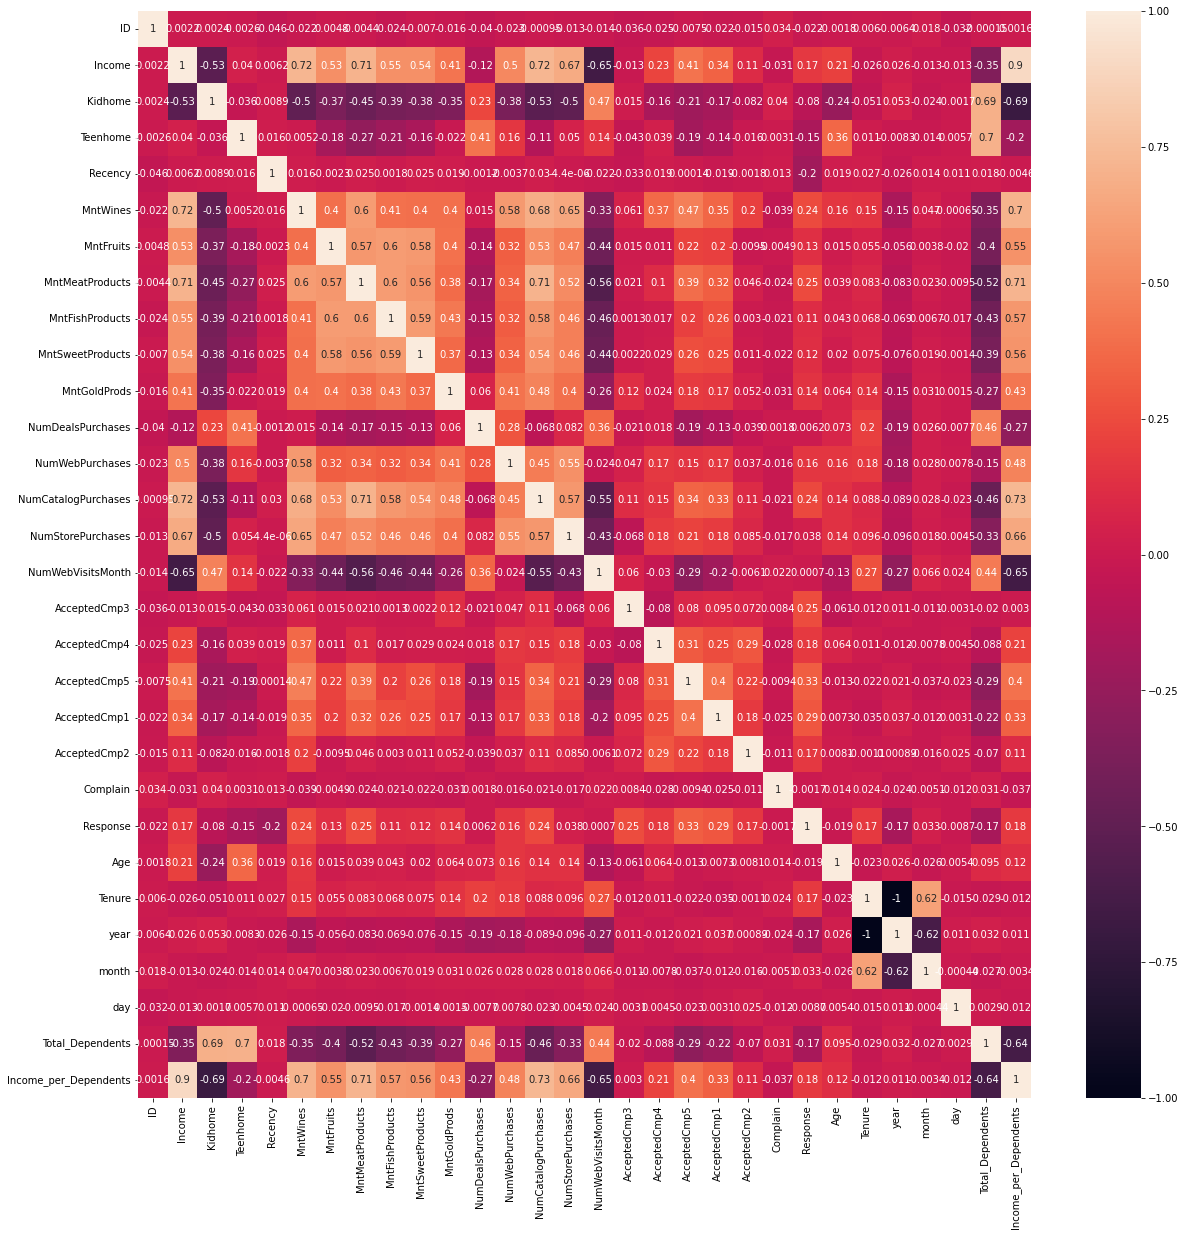

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2g',vmin=-1,vmax=1)

In [67]:
df = df.drop(['ID','day','Year_Birth','Dt_Customer'],axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,Age_group,Total_Dependents,Income_per_Dependents,income_bin,recency_bin
0,Graduation,Single,58138.0,0,0,58,635,88,546,172.0,88.0,88,3,8,10.0,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,>60,0,58138.0,Lebih dari 52000,diatas 30 Hari
1,Graduation,Divorced,46344.0,1,1,38,11,1,6,2.0,1.0,6,2,1,1.0,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,>60,2,23172.0,S/D 52000,diatas 30 Hari
2,Graduation,Married,71613.0,0,0,26,426,49,127,111.0,21.0,42,1,8,2.0,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,50-60,0,71613.0,Lebih dari 52000,21-30 Hari
3,Graduation,Married,26646.0,1,0,26,11,4,20,10.0,3.0,5,2,2,0.0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,30-40,1,26646.0,S/D 52000,21-30 Hari
4,PhD,Married,58293.0,1,0,94,173,43,118,46.0,27.0,15,5,5,3.0,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,40-50,1,58293.0,Lebih dari 52000,diatas 30 Hari


In [68]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089
std,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104
min,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1285.000000,172.000000,915.000000,226.220000,177.220000,227.000000


In [69]:
wines = []
for x in df['MntWines']:
    if x<=24:
        wines.append('0-24')
    elif x<=173:
        wines.append('24-173')
    elif x<=504:
        wines.append('173-504')
    else:
        wines.append('>504')

<AxesSubplot:title={'center':'Jumlah Pemesanan Wines'}, xlabel='wines_bin'>

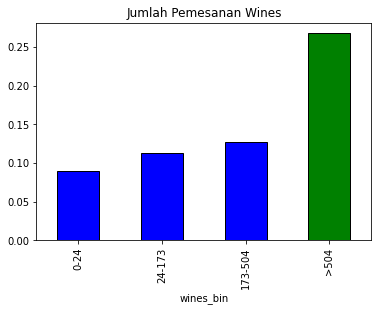

In [70]:
df['wines_bin'] = wines
df.groupby('wines_bin')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b','b',
                                                                                                                  'b','g'],
                                                                                  title='Jumlah Pemesanan Wines')

<AxesSubplot:title={'center':'Jumlah Pemesanan Fruits'}, xlabel='fruits_bin'>

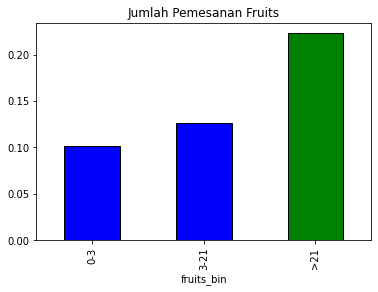

In [71]:
fruits = []
for x in df['MntFruits']:
    if x<=3:
        fruits.append('0-3')
    elif x<=21:
        fruits.append('3-21')
    else:
        fruits.append('>21')
        
        
df['fruits_bin'] = fruits
df.groupby('fruits_bin')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b',
                                                                                                                  'b','g'],
                                                                                  title='Jumlah Pemesanan Fruits')

<AxesSubplot:title={'center':'Jumlah Pemesanan Meat'}, xlabel='meat_products'>

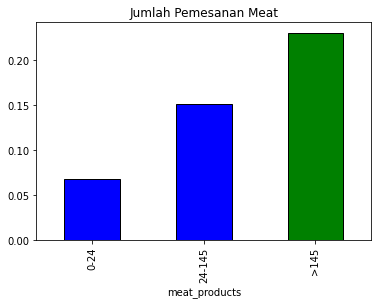

In [72]:
meat_products = []
for x in df['MntMeatProducts']:
    if x<=24:
        meat_products.append('0-24')
    elif x<=145:
        meat_products.append('24-145')
    else:
        meat_products.append('>145')
        
        
df['meat_products'] = meat_products
df.groupby('meat_products')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b',
                                                                                                                  'b','g'],
                                                                                  title='Jumlah Pemesanan Meat')

<AxesSubplot:title={'center':'Jumlah Pemesanan Fish'}, xlabel='fish_product'>

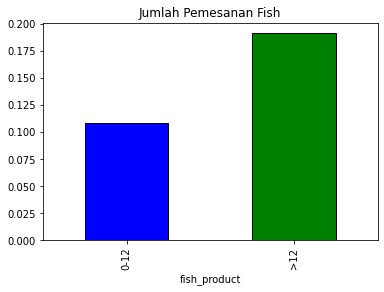

In [73]:
fish = []
for x in df['MntFishProducts']:
    if x<=12:
        fish.append('0-12')
    else:
        fish.append('>12')
        
        
df['fish_product'] = fish
df.groupby('fish_product')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b','g'],
                                                                                  title='Jumlah Pemesanan Fish')

<AxesSubplot:title={'center':'Jumlah Pemesanan Sweet'}, xlabel='sweet_product'>

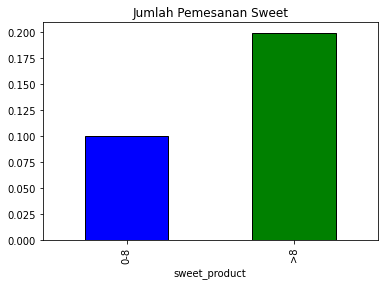

In [74]:
sweet = []
for x in df['MntSweetProducts']:
    if x<=8:
        sweet.append('0-8')
    else:
        sweet.append('>8')
        
        
df['sweet_product'] = sweet
df.groupby('sweet_product')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b','g'],
                                                                                  title='Jumlah Pemesanan Sweet')

<AxesSubplot:title={'center':'Jumlah Pemesanan Gold'}, xlabel='gold_product'>

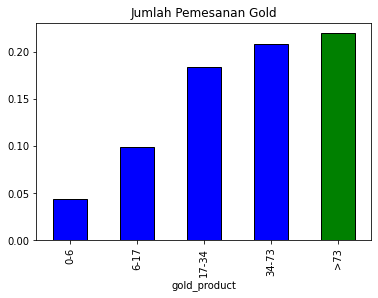

In [75]:
gold = []
for x in df['MntGoldProds']:
    if x<=6:
        gold.append('0-6')
    elif x<=17:
        gold.append('6-17')
    elif x<=34:
        gold.append('17-34')
    elif x<=73:
        gold.append('34-73')
    else:
        gold.append('>73')
        
        
df['gold_product'] = gold
df.groupby('gold_product')['Response'].mean().sort_values(axis=0,ascending=True).plot(kind='bar',edgecolor='k',color=['b','b',
                                                                                                                  'b','b','g'],
                                                                                  title='Jumlah Pemesanan Gold')

In [76]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,Age_group,Total_Dependents,Income_per_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product
0,Graduation,Single,58138.0,0,0,58,635,88,546,172.0,88.0,88,3,8,10.0,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,>60,0,58138.0,Lebih dari 52000,diatas 30 Hari,>504,>21,>145,>12,>8,>73
1,Graduation,Divorced,46344.0,1,1,38,11,1,6,2.0,1.0,6,2,1,1.0,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,>60,2,23172.0,S/D 52000,diatas 30 Hari,0-24,0-3,0-24,0-12,0-8,0-6
2,Graduation,Married,71613.0,0,0,26,426,49,127,111.0,21.0,42,1,8,2.0,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,50-60,0,71613.0,Lebih dari 52000,21-30 Hari,173-504,>21,24-145,>12,>8,34-73
3,Graduation,Married,26646.0,1,0,26,11,4,20,10.0,3.0,5,2,2,0.0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,30-40,1,26646.0,S/D 52000,21-30 Hari,0-24,3-21,0-24,0-12,0-8,0-6
4,PhD,Married,58293.0,1,0,94,173,43,118,46.0,27.0,15,5,5,3.0,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,40-50,1,58293.0,Lebih dari 52000,diatas 30 Hari,24-173,>21,24-145,>12,>8,6-17


In [77]:
year_month = []
for x,y in zip(df['year'],df['month']):
    year_month.append(str(x)+"-"+str(y)) 

In [78]:
df['year_month'] = year_month
df['year_month']  = pd.to_datetime(df['year_month'], format='%Y-%m')
df.groupby('year_month').agg({'Response':[len,'sum','mean']})

Response              
                len sum      mean
year_month                       
2012-07-01        2   1  0.500000
2012-08-01      118  32  0.271186
2012-09-01       99  36  0.363636
2012-10-01       95  26  0.273684
2012-11-01       97  24  0.247423
2012-12-01       83  13  0.156627
2013-01-01      107  22  0.205607
2013-02-01      100  16  0.160000
2013-03-01      102  17  0.166667
2013-04-01       88  15  0.170455
2013-05-01      104  17  0.163462
2013-06-01       92  11  0.119565
2013-07-01       99  10  0.101010
2013-08-01      104  14  0.134615
2013-09-01       94   5  0.053191
2013-10-01      117  13  0.111111
2013-11-01       90   9  0.100000
2013-12-01       92   5  0.054348
2014-01-01       90   8  0.088889
2014-02-01       78  12  0.153846
2014-03-01      109   9  0.082569
2014-04-01       94   7  0.074468
2014-05-01      112   7  0.062500
2014-06-01       74   5  0.067568

In [79]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,Age_group,Total_Dependents,Income_per_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product,year_month
0,Graduation,Single,58138.0,0,0,58,635,88,546,172.0,88.0,88,3,8,10.0,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,>60,0,58138.0,Lebih dari 52000,diatas 30 Hari,>504,>21,>145,>12,>8,>73,2012-09-01
1,Graduation,Divorced,46344.0,1,1,38,11,1,6,2.0,1.0,6,2,1,1.0,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,>60,2,23172.0,S/D 52000,diatas 30 Hari,0-24,0-3,0-24,0-12,0-8,0-6,2014-03-01
2,Graduation,Married,71613.0,0,0,26,426,49,127,111.0,21.0,42,1,8,2.0,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,50-60,0,71613.0,Lebih dari 52000,21-30 Hari,173-504,>21,24-145,>12,>8,34-73,2013-08-01
3,Graduation,Married,26646.0,1,0,26,11,4,20,10.0,3.0,5,2,2,0.0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,30-40,1,26646.0,S/D 52000,21-30 Hari,0-24,3-21,0-24,0-12,0-8,0-6,2014-02-01
4,PhD,Married,58293.0,1,0,94,173,43,118,46.0,27.0,15,5,5,3.0,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,40-50,1,58293.0,Lebih dari 52000,diatas 30 Hari,24-173,>21,24-145,>12,>8,6-17,2014-01-01


In [80]:
df['Accepted_cmp_previous'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Accepted_cmp_previous'] = df['Accepted_cmp_previous'].apply(lambda x:1 if x>=1 else 0)
df.groupby('Accepted_cmp_previous').agg({'Response':[len,'sum','mean']})

Response               
                           len  sum      mean
Accepted_cmp_previous                        
0                         1777  146  0.082161
1                          463  188  0.406048

In [81]:
df.loc[df['NumCatalogPurchases']>=10.61,'NumCatalogPurchases'] = 10

In [82]:
catalog_purchase = []
for x in df['NumCatalogPurchases']:
    if x<=1:
        catalog_purchase.append('0-1 Kali')
    elif x<=3:
        catalog_purchase.append('2-3 Kali')
    elif x<=5:
        catalog_purchase.append('4-5 Kali')
    else:
        catalog_purchase.append('lebih dari 5 Kali')
df['catalog_purchase'] = catalog_purchase
df.groupby('catalog_purchase')['Response'].mean()

catalog_purchase
0-1 Kali             0.085873
2-3 Kali             0.141304
4-5 Kali             0.192547
lebih dari 5 Kali    0.304000
Name: Response, dtype: float64

In [83]:
df.groupby('NumDealsPurchases').agg({'Response':[len,'sum','mean']})

Response               
                       len  sum      mean
NumDealsPurchases                        
0                       46   16  0.347826
1                      970  160  0.164948
2                      497   48  0.096579
3                      297   38  0.127946
4                      189   26  0.137566
5                       94   16  0.170213
6                       61   12  0.196721
7                       40    8  0.200000
8                       14    1  0.071429
9                        8    3  0.375000
10                      24    6  0.250000

<AxesSubplot:xlabel='deals_purchase'>

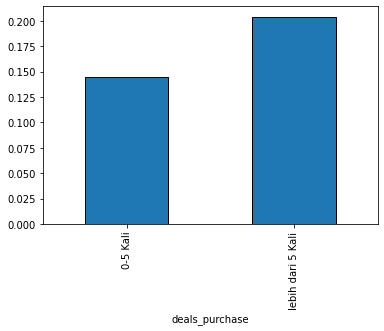

In [84]:
deals_purchase = []
for x in df['NumDealsPurchases']:
    if x<=5:
        deals_purchase.append('0-5 Kali')
    else:
        deals_purchase.append('lebih dari 5 Kali')
df['deals_purchase'] = deals_purchase
df.groupby('deals_purchase')['Response'].mean().plot(kind='bar',edgecolor='k')

# Data Preprocessing

In [85]:
data = df.copy()
data = data[['Education', 'Marital_Status','Tenure','Age_group','Total_Dependents','income_bin',
       'recency_bin', 'wines_bin', 'fruits_bin',
       'meat_products', 'fish_product', 'sweet_product', 'gold_product',
       'Accepted_cmp_previous', 'catalog_purchase','Response']]

In [86]:
data.head()

,Education,Marital_Status,Tenure,Age_group,Total_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product,Accepted_cmp_previous,catalog_purchase,Response
0,Graduation,Single,9.0,>60,0,Lebih dari 52000,diatas 30 Hari,>504,>21,>145,>12,>8,>73,0,lebih dari 5 Kali,1
1,Graduation,Divorced,7.0,>60,2,S/D 52000,diatas 30 Hari,0-24,0-3,0-24,0-12,0-8,0-6,0,0-1 Kali,0
2,Graduation,Married,8.0,50-60,0,Lebih dari 52000,21-30 Hari,173-504,>21,24-145,>12,>8,34-73,0,2-3 Kali,0
3,Graduation,Married,7.0,30-40,1,S/D 52000,21-30 Hari,0-24,3-21,0-24,0-12,0-8,0-6,0,0-1 Kali,0
4,PhD,Married,7.0,40-50,1,Lebih dari 52000,diatas 30 Hari,24-173,>21,24-145,>12,>8,6-17,0,2-3 Kali,0


In [87]:
variable = [var for var in data.columns if 'Response' not in var]
variable

['Education',
 'Marital_Status',
 'Tenure',
 'Age_group',
 'Total_Dependents',
 'income_bin',
 'recency_bin',
 'wines_bin',
 'fruits_bin',
 'meat_products',
 'fish_product',
 'sweet_product',
 'gold_product',
 'Accepted_cmp_previous',
 'catalog_purchase']

In [88]:
from feature_engine.encoding import PRatioEncoder

In [89]:
for x in variable:
    data[x] = data[x].astype(str)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Education              2240 non-null   object
 1   Marital_Status         2240 non-null   object
 2   Tenure                 2240 non-null   object
 3   Age_group              2240 non-null   object
 4   Total_Dependents       2240 non-null   object
 5   income_bin             2240 non-null   object
 6   recency_bin            2240 non-null   object
 7   wines_bin              2240 non-null   object
 8   fruits_bin             2240 non-null   object
 9   meat_products          2240 non-null   object
 10  fish_product           2240 non-null   object
 11  sweet_product          2240 non-null   object
 12  gold_product           2240 non-null   object
 13  Accepted_cmp_previous  2240 non-null   object
 14  catalog_purchase       2240 non-null   object
 15  Response             

In [91]:
ratio_enc = PRatioEncoder(
    encoding_method = 'ratio',
    variables=variable)

In [92]:
ratio_enc.fit(data[variable], data.Response)

PRatioEncoder(variables=['Education', 'Marital_Status', 'Tenure', 'Age_group',
                         'Total_Dependents', 'income_bin', 'recency_bin',
                         'wines_bin', 'fruits_bin', 'meat_products',
                         'fish_product', 'sweet_product', 'gold_product',
                         'Accepted_cmp_previous', 'catalog_purchase'])

In [93]:
ratio_enc.encoder_dict_

{'Education': {'2n Cycle': 0.12154696132596686,
  'Basic': 0.03846153846153846,
  'Graduation': 0.15589743589743588,
  'Master': 0.18210862619808307,
  'PhD': 0.2623376623376623},
 'Marital_Status': {'Divorced': 0.21124031007751937,
  'Married': 0.12354312354312355,
  'Single': 0.6407766990291262},
 'Tenure': {'7.0': 0.09270216962524655,
  '8.0': 0.14946962391513982,
  '9.0': 0.3646408839779006},
 'Age_group': {'30-40': 0.2581818181818182,
  '40-50': 0.1493848857644991,
  '50-60': 0.16071428571428573,
  '>60': 0.17383512544802868},
 'Total_Dependents': {'0': 0.3603411513859275,
  '1': 0.11462450592885375,
  '2': 0.12566844919786097,
  '3': 0.0392156862745098},
 'income_bin': {'Lebih dari 52000': 0.23137697516930023,
  'S/D 52000': 0.1264705882352941},
 'recency_bin': {'0-10 Hari': 0.446927374301676,
  '11-20 hari': 0.34567901234567905,
  '21-30 Hari': 0.17619047619047618,
  'diatas 30 Hari': 0.11881918819188192},
 'wines_bin': {'0-24': 0.0978886756238004,
  '173-504': 0.145194274028629

In [94]:
data[variable] = ratio_enc.transform(data[variable])

In [95]:
data.head()

,Education,Marital_Status,Tenure,Age_group,Total_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product,Accepted_cmp_previous,catalog_purchase,Response
0,0.155897,0.640777,0.364641,0.173835,0.360341,0.231377,0.118819,0.365854,0.286972,0.299652,0.236753,0.249436,0.281609,0.089516,0.436782,1
1,0.155897,0.211240,0.092702,0.173835,0.125668,0.126471,0.118819,0.097889,0.112971,0.072931,0.121688,0.110784,0.045977,0.089516,0.093939,0
2,0.155897,0.123543,0.149470,0.160714,0.360341,0.231377,0.176190,0.145194,0.286972,0.177706,0.236753,0.249436,0.263006,0.089516,0.164557,0
3,0.155897,0.123543,0.092702,0.258182,0.114625,0.126471,0.176190,0.097889,0.144928,0.072931,0.121688,0.110784,0.045977,0.089516,0.093939,0
4,0.262338,0.123543,0.092702,0.149385,0.114625,0.231377,0.118819,0.127572,0.286972,0.177706,0.236753,0.249436,0.109557,0.089516,0.164557,0


<AxesSubplot:>

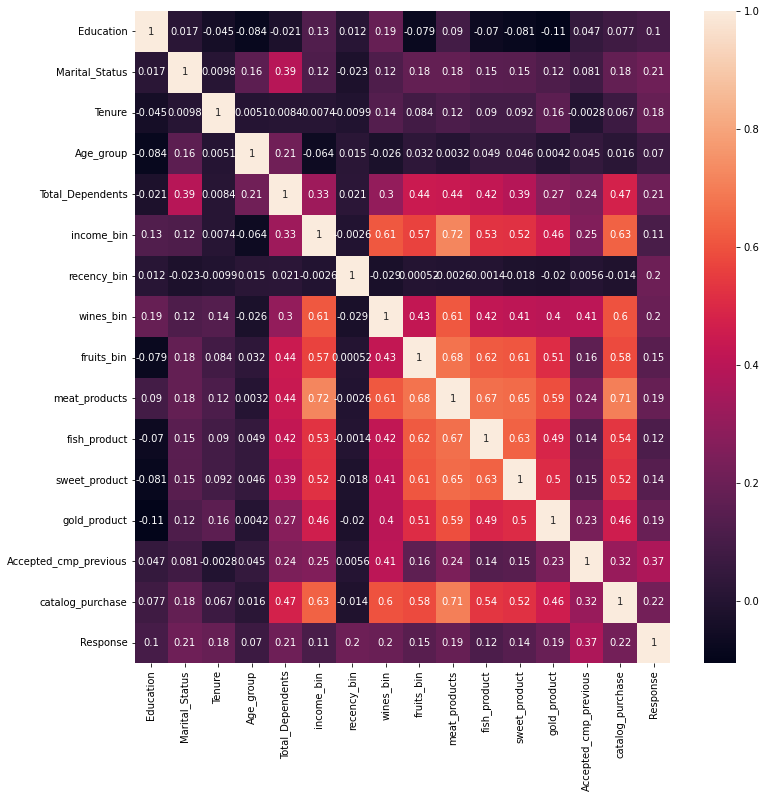

In [96]:
#check multicolinearity
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

# Build Model

In [97]:
X = data[variable].copy()
y = data['Response'].copy()

In [98]:
#Smart Performance
# random forest
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=20,
    n_jobs=5,
)

# correlation selector
sel = SmartCorrelatedSelection(
    variables=None, # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=5,
)

# this may take a while, because we are training
# a random forest per correlation group

sel.fit(X, y)

SmartCorrelatedSelection(cv=5,
                         estimator=RandomForestClassifier(n_estimators=10,
                                                          n_jobs=5,
                                                          random_state=20),
                         missing_values='raise',
                         selection_method='model_performance')

In [99]:
sel.correlated_feature_sets_[0:]

[]

In [100]:
# drop correlated features

X =X.drop(X[sel.features_to_drop_].columns,axis=1)
X.head()

,Education,Marital_Status,Tenure,Age_group,Total_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product,Accepted_cmp_previous,catalog_purchase
0,0.155897,0.640777,0.364641,0.173835,0.360341,0.231377,0.118819,0.365854,0.286972,0.299652,0.236753,0.249436,0.281609,0.089516,0.436782
1,0.155897,0.211240,0.092702,0.173835,0.125668,0.126471,0.118819,0.097889,0.112971,0.072931,0.121688,0.110784,0.045977,0.089516,0.093939
2,0.155897,0.123543,0.149470,0.160714,0.360341,0.231377,0.176190,0.145194,0.286972,0.177706,0.236753,0.249436,0.263006,0.089516,0.164557
3,0.155897,0.123543,0.092702,0.258182,0.114625,0.126471,0.176190,0.097889,0.144928,0.072931,0.121688,0.110784,0.045977,0.089516,0.093939
4,0.262338,0.123543,0.092702,0.149385,0.114625,0.231377,0.118819,0.127572,0.286972,0.177706,0.236753,0.249436,0.109557,0.089516,0.164557


In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1568, 15)
(672, 15)
(1568,)
(672,)


# Model Caluculation

In [103]:
model  = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [104]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:,1]

In [105]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,y_train_proba)
roc_auc_value = roc_auc_score(y_train,y_train_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on Train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on Train data: ', round(gini_value*100, 2), '%')

AUC for Logreg on Train data:  86.12 %
Gini for Logreg Forest on Train data:  72.24 %


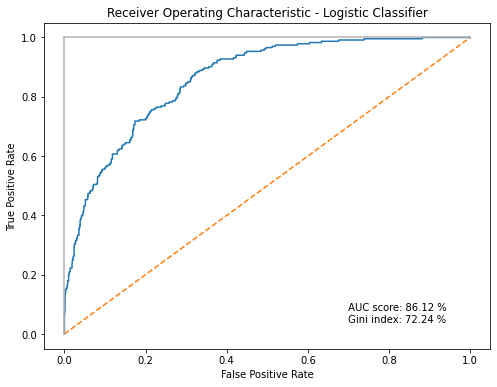

In [106]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(ax.get_xlim()[1]*6/10, 
         0, 
         f"""\n
         AUC score: {round(roc_auc_value*100, 2)} %
         Gini index: {round(gini_value*100, 2)} %
         """)

plt.show()

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1334
           1       0.68      0.23      0.35       234

    accuracy                           0.87      1568
   macro avg       0.78      0.61      0.64      1568
weighted avg       0.85      0.87      0.84      1568



Text(33.0, 0.5, 'Realita')

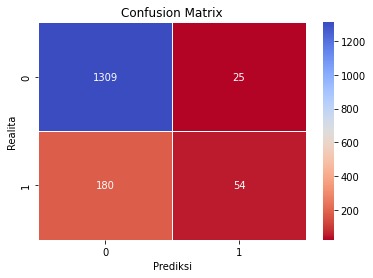

In [107]:
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [108]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.8692602040816326
Recall Training data :  0.23076923076923078
Precision Training data :  0.6835443037974683
F-1 Training data :  0.34504792332268375


In [109]:
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:,1]

In [110]:
print("Accuracy Training data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Training data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Training data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Training data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Training data :  0.8824404761904762
Recall Training data :  0.29
Precision Training data :  0.7837837837837838
F-1 Training data :  0.4233576642335766


In [111]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_test_proba)
roc_auc_value = roc_auc_score(y_test,y_test_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on Test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg on test data: ', round(gini_value*100, 2), '%')

AUC for Logreg on Test data:  85.41 %
Gini for Logreg on test data:  70.82 %


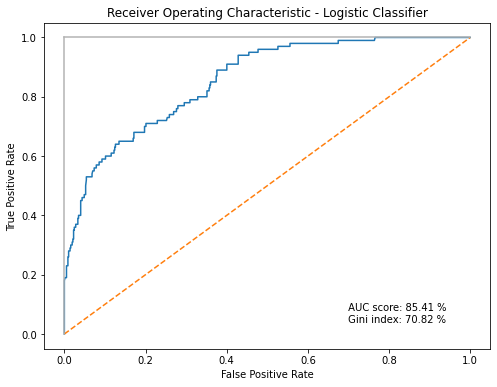

In [112]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(ax.get_xlim()[1]*6/10, 
         0, 
         f"""\n
         AUC score: {round(roc_auc_value*100, 2)} %
         Gini index: {round(gini_value*100, 2)} %
         """)

plt.show()

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       572
           1       0.78      0.29      0.42       100

    accuracy                           0.88       672
   macro avg       0.84      0.64      0.68       672
weighted avg       0.87      0.88      0.86       672



Text(33.0, 0.5, 'Realita')

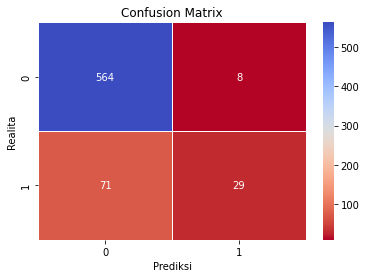

In [113]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

# Tunning Parameter

In [114]:
param_grid = {"penalty": ["l1","l2","elasticnet"],
             'C' : [1.0,2.0,3.0],
             'max_iter':[100,200,300,500],
             'solver' : ['newton-cg','lbfgs','sag','saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model,param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [115]:
grid_search.best_params_

{'C': 3.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [116]:
y_train_pred = grid_search.predict(X_train)
y_train_proba = grid_search.predict_proba(X_train)[:,1]

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1334
           1       0.65      0.34      0.45       234

    accuracy                           0.87      1568
   macro avg       0.77      0.65      0.69      1568
weighted avg       0.86      0.87      0.86      1568



Text(33.0, 0.5, 'Realita')

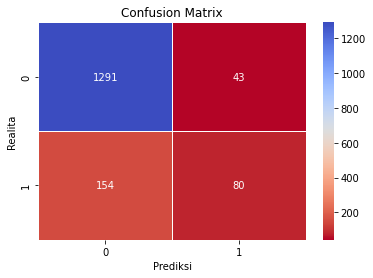

In [117]:
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [118]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.8743622448979592
Recall Training data :  0.3418803418803419
Precision Training data :  0.6504065040650406
F-1 Training data :  0.4481792717086835


In [119]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,y_train_proba)
roc_auc_value = roc_auc_score(y_train,y_train_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on Train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on Train data: ', round(gini_value*100, 2), '%')

AUC for Logreg on Train data:  86.86 %
Gini for Logreg Forest on Train data:  73.72 %


In [120]:
y_test_pred = grid_search.predict(X_test)
y_test_proba = grid_search.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       572
           1       0.74      0.35      0.48       100

    accuracy                           0.89       672
   macro avg       0.82      0.66      0.71       672
weighted avg       0.87      0.89      0.87       672



Text(33.0, 0.5, 'Realita')

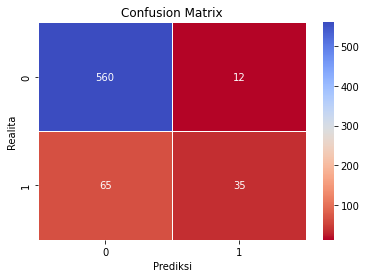

In [121]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [122]:
print("Accuracy Training data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Training data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Training data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Training data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Training data :  0.8854166666666666
Recall Training data :  0.35
Precision Training data :  0.7446808510638298
F-1 Training data :  0.47619047619047616


In [123]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_test_proba)
roc_auc_value = roc_auc_score(y_test,y_test_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on Test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Logreg on Test data:  86.31 %
Gini for Logreg Forest on test data:  72.62 %


In [124]:
feature_importance = pd.DataFrame(grid_search.best_estimator_.coef_[0],
                                 index=X_train.columns,
                                 columns=['Importance']).sort_values('Importance',ascending=False)

<AxesSubplot:>

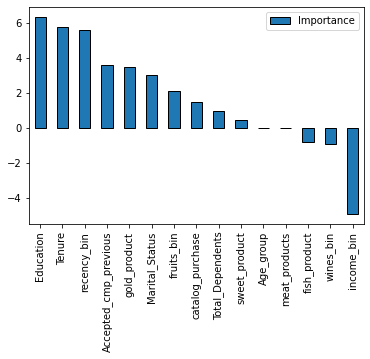

In [125]:
feature_importance.plot(kind='bar',edgecolor='k')

# Probability Decile Analysis

In [126]:
y_pred_proba = grid_search.predict_proba(X)[:,1]
df['proba'] = y_pred_proba

In [127]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,year,month,Age_group,Total_Dependents,Income_per_Dependents,income_bin,recency_bin,wines_bin,fruits_bin,meat_products,fish_product,sweet_product,gold_product,year_month,Accepted_cmp_previous,catalog_purchase,deals_purchase,proba
0,Graduation,Single,58138.0,0,0,58,635,88,546,172.0,88.0,88,3,8,10.0,4,7,0,0,0,0,0,0,1,65.0,9.0,2012,9,>60,0,58138.0,Lebih dari 52000,diatas 30 Hari,>504,>21,>145,>12,>8,>73,2012-09-01,0,lebih dari 5 Kali,0-5 Kali,0.430302
1,Graduation,Divorced,46344.0,1,1,38,11,1,6,2.0,1.0,6,2,1,1.0,2,5,0,0,0,0,0,0,0,68.0,7.0,2014,3,>60,2,23172.0,S/D 52000,diatas 30 Hari,0-24,0-3,0-24,0-12,0-8,0-6,2014-03-01,0,0-1 Kali,0-5 Kali,0.013105
2,Graduation,Married,71613.0,0,0,26,426,49,127,111.0,21.0,42,1,8,2.0,10,4,0,0,0,0,0,0,0,57.0,8.0,2013,8,50-60,0,71613.0,Lebih dari 52000,21-30 Hari,173-504,>21,24-145,>12,>8,34-73,2013-08-01,0,2-3 Kali,0-5 Kali,0.044968
3,Graduation,Married,26646.0,1,0,26,11,4,20,10.0,3.0,5,2,2,0.0,4,6,0,0,0,0,0,0,0,38.0,7.0,2014,2,30-40,1,26646.0,S/D 52000,21-30 Hari,0-24,3-21,0-24,0-12,0-8,0-6,2014-02-01,0,0-1 Kali,0-5 Kali,0.014669
4,PhD,Married,58293.0,1,0,94,173,43,118,46.0,27.0,15,5,5,3.0,6,5,0,0,0,0,0,0,0,41.0,7.0,2014,1,40-50,1,58293.0,Lebih dari 52000,diatas 30 Hari,24-173,>21,24-145,>12,>8,6-17,2014-01-01,0,2-3 Kali,0-5 Kali,0.022052


In [128]:
df['p_rank_logreg'] = pd.qcut(df['proba'].rank(method='first').values,10,duplicates='drop').codes+1

In [156]:
df[['proba','p_rank_logreg']].head()

,proba,p_rank_logreg
0,0.430302,9
1,0.013105,1
2,0.044968,5
3,0.014669,1
4,0.022052,3


In [171]:
df.groupby('p_rank_logreg')['proba'].mean()

p_rank_logreg
1     0.011994
2     0.018227
3     0.024912
4     0.034621
5     0.051526
6     0.081122
7     0.122983
8     0.187926
9     0.315663
10    0.624550
Name: proba, dtype: float64

In [130]:
rank_df = df.groupby("p_rank_logreg")['Response'].agg(['count','mean']).sort_values('p_rank_logreg',ascending=False)
rank_df.rename(columns={'mean':'actual_event_rate'},inplace=True)
rank_df

,count,actual_event_rate
p_rank_logreg,,
10,224,0.642857
9,224,0.290179
8,224,0.183036
7,224,0.165179
6,224,0.107143
5,224,0.066964
4,224,0.022321
3,224,0.008929
2,224,0.004464


In [131]:
rank_df['N_events'] = rank_df['count']*rank_df['actual_event_rate']
rank_df['cum_events'] = rank_df['N_events'].cumsum()
rank_df['event_cap'] = rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap'] = rank_df['event_cap'].cumsum()
rank_df

,count,actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
p_rank_logreg,,,,,,
10,224,0.642857,144.0,144.0,0.431138,0.431138
9,224,0.290179,65.0,209.0,0.194611,0.625749
8,224,0.183036,41.0,250.0,0.122754,0.748503
7,224,0.165179,37.0,287.0,0.110778,0.859281
6,224,0.107143,24.0,311.0,0.071856,0.931138
5,224,0.066964,15.0,326.0,0.044910,0.976048
4,224,0.022321,5.0,331.0,0.014970,0.991018
3,224,0.008929,2.0,333.0,0.005988,0.997006
2,224,0.004464,1.0,334.0,0.002994,1.000000


In [132]:
rank_df['N_non_events'] = rank_df['count'] - rank_df['N_events']
rank_df['cum_non_events'] = rank_df['N_non_events'].cumsum()
rank_df['non_event_cap'] = rank_df['cum_non_events']/max(rank_df['cum_non_events'].cumsum())
rank_df['cum_non_event_cap'] = rank_df['non_event_cap'].cumsum()
rank_df

,count,actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
p_rank_logreg,,,,,,,,,,
10,224,0.642857,144.0,144.0,0.431138,0.431138,80.0,80.0,0.008456,0.008456
9,224,0.290179,65.0,209.0,0.194611,0.625749,159.0,239.0,0.025262,0.033717
8,224,0.183036,41.0,250.0,0.122754,0.748503,183.0,422.0,0.044604,0.078322
7,224,0.165179,37.0,287.0,0.110778,0.859281,187.0,609.0,0.064370,0.142691
6,224,0.107143,24.0,311.0,0.071856,0.931138,200.0,809.0,0.085509,0.228200
5,224,0.066964,15.0,326.0,0.044910,0.976048,209.0,1018.0,0.107600,0.335800
4,224,0.022321,5.0,331.0,0.014970,0.991018,219.0,1237.0,0.130747,0.466547
3,224,0.008929,2.0,333.0,0.005988,0.997006,222.0,1459.0,0.154212,0.620759
2,224,0.004464,1.0,334.0,0.002994,1.000000,223.0,1682.0,0.177782,0.798541


In [133]:
#compute ks statistics and Lift over baseline event rate
rank_df['KS'] = round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['baseline_event_rate'] = (max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['lift_over_avg'] = rank_df['actual_event_rate']/rank_df['baseline_event_rate']
rank_df

,count,actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,baseline_event_rate,lift_over_avg
p_rank_logreg,,,,,,,,,,,,,
10,224,0.642857,144.0,144.0,0.431138,0.431138,80.0,80.0,0.008456,0.008456,0.4227,0.149107,4.311377
9,224,0.290179,65.0,209.0,0.194611,0.625749,159.0,239.0,0.025262,0.033717,0.5920,0.149107,1.946108
8,224,0.183036,41.0,250.0,0.122754,0.748503,183.0,422.0,0.044604,0.078322,0.6702,0.149107,1.227545
7,224,0.165179,37.0,287.0,0.110778,0.859281,187.0,609.0,0.064370,0.142691,0.7166,0.149107,1.107784
6,224,0.107143,24.0,311.0,0.071856,0.931138,200.0,809.0,0.085509,0.228200,0.7029,0.149107,0.718563
5,224,0.066964,15.0,326.0,0.044910,0.976048,209.0,1018.0,0.107600,0.335800,0.6402,0.149107,0.449102
4,224,0.022321,5.0,331.0,0.014970,0.991018,219.0,1237.0,0.130747,0.466547,0.5245,0.149107,0.149701
3,224,0.008929,2.0,333.0,0.005988,0.997006,222.0,1459.0,0.154212,0.620759,0.3762,0.149107,0.059880
2,224,0.004464,1.0,334.0,0.002994,1.000000,223.0,1682.0,0.177782,0.798541,0.2015,0.149107,0.029940


In [134]:
rank_df = rank_df.reset_index()
rank_df['Decile'] = rank_df.index+1
rank_df

,p_rank_logreg,count,actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,baseline_event_rate,lift_over_avg,Decile
0,10,224,0.642857,144.0,144.0,0.431138,0.431138,80.0,80.0,0.008456,0.008456,0.4227,0.149107,4.311377,1
1,9,224,0.290179,65.0,209.0,0.194611,0.625749,159.0,239.0,0.025262,0.033717,0.5920,0.149107,1.946108,2
2,8,224,0.183036,41.0,250.0,0.122754,0.748503,183.0,422.0,0.044604,0.078322,0.6702,0.149107,1.227545,3
3,7,224,0.165179,37.0,287.0,0.110778,0.859281,187.0,609.0,0.064370,0.142691,0.7166,0.149107,1.107784,4
4,6,224,0.107143,24.0,311.0,0.071856,0.931138,200.0,809.0,0.085509,0.228200,0.7029,0.149107,0.718563,5
5,5,224,0.066964,15.0,326.0,0.044910,0.976048,209.0,1018.0,0.107600,0.335800,0.6402,0.149107,0.449102,6
6,4,224,0.022321,5.0,331.0,0.014970,0.991018,219.0,1237.0,0.130747,0.466547,0.5245,0.149107,0.149701,7
7,3,224,0.008929,2.0,333.0,0.005988,0.997006,222.0,1459.0,0.154212,0.620759,0.3762,0.149107,0.059880,8
8,2,224,0.004464,1.0,334.0,0.002994,1.000000,223.0,1682.0,0.177782,0.798541,0.2015,0.149107,0.029940,9
9,1,224,0.000000,0.0,334.0,0.000000,1.000000,224.0,1906.0,0.201459,1.000000,0.0000,0.149107,0.000000,10


In [173]:
rank_df[['count','actual_event_rate','N_events','cum_events','p_rank_logreg','Decile']]

,count,actual_event_rate,N_events,cum_events,p_rank_logreg,Decile
0,224,0.642857,144.0,144.0,10,1
1,224,0.290179,65.0,209.0,9,2
2,224,0.183036,41.0,250.0,8,3
3,224,0.165179,37.0,287.0,7,4
4,224,0.107143,24.0,311.0,6,5
5,224,0.066964,15.0,326.0,5,6
6,224,0.022321,5.0,331.0,4,7
7,224,0.008929,2.0,333.0,3,8
8,224,0.004464,1.0,334.0,2,9
9,224,0.000000,0.0,334.0,1,10


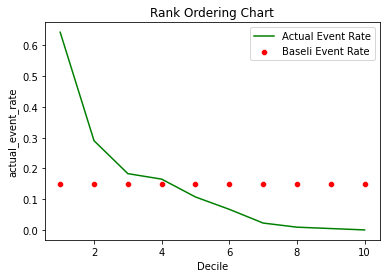

In [135]:
#create visualization probability
ax = sns.lineplot(x='Decile',y='actual_event_rate',data=rank_df,color='green').set_title('Rank Ordering Chart')
ax = sns.scatterplot(y='baseline_event_rate',x='Decile',data=rank_df,color='r')
ax.legend(['Actual Event Rate','Baseli Event Rate'])

<AxesSubplot:xlabel='Decile', ylabel='KS'>

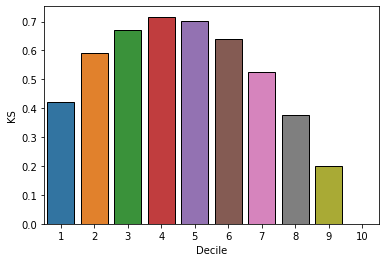

In [136]:
sns.barplot(data=rank_df,x='Decile',y='KS',edgecolor='k')

In [162]:
data_train = pd.DataFrame()
data_test = pd.DataFrame()

In [163]:
data_train["proba"] = grid_search.predict_proba(X_train)[:,1]
data_test["proba"] = grid_search.predict_proba(X_test)[:,1]

In [164]:
data_train["label"] = pd.DataFrame(y_train).reset_index(drop=True)
data_test["label"] = pd.DataFrame(y_test).reset_index(drop=True)

In [179]:
data_test_split_proba = data_test[['label', 'proba']]
data_test_split_proba['bins'] = pd.qcut(data_test_split_proba['proba'], q=5)
#data_test_split_proba['bin'] = pd.cut(data_test_split_proba['proba'], bins=[0.010499999999999999, 0.085, 0.188, 0.331, 0.548, 0.943])
data_test_split_proba.head()

,label,proba,bins
0,0,0.306388,"(0.229, 0.939]"
1,0,0.504689,"(0.229, 0.939]"
2,0,0.277656,"(0.229, 0.939]"
3,0,0.061398,"(0.0411, 0.102]"
4,1,0.073959,"(0.0411, 0.102]"


In [180]:
cnt_per_bin2 = data_test_split_proba.bins.value_counts().to_frame().reset_index().rename(columns={'bins':'cnt_debtors'}).sort_values('index')
cnt_per_bin2.head()

,index,cnt_debtors
0,"(0.00501, 0.0211]",136
4,"(0.0211, 0.0411]",133
2,"(0.0411, 0.102]",134
3,"(0.102, 0.229]",134
1,"(0.229, 0.939]",135


In [181]:
good_per_bin2 = data_test_split_proba.groupby(['bins','label']).count().reset_index().rename(columns={'proba':'cnt_good_debtors'})
good_per_bin2 = good_per_bin2[good_per_bin2['label']==1]
good_per_bin2.head()

,bins,label,cnt_good_debtors
1,"(0.00501, 0.0211]",1,0
3,"(0.0211, 0.0411]",1,2
5,"(0.0411, 0.102]",1,17
7,"(0.102, 0.229]",1,19
9,"(0.229, 0.939]",1,62


In [182]:
summary2 = good_per_bin2.merge(cnt_per_bin2, how='inner', right_on='index', left_on='bins')
summary2['pct_good_average'] = round((summary2['cnt_good_debtors'] / summary2['cnt_debtors'])*100 , 2)
summary2.head()

,bins,label,cnt_good_debtors,index,cnt_debtors,pct_good_average
0,"(0.00501, 0.0211]",1,0,"(0.00501, 0.0211]",136,0.00
1,"(0.0211, 0.0411]",1,2,"(0.0211, 0.0411]",133,1.50
2,"(0.0411, 0.102]",1,17,"(0.0411, 0.102]",134,12.69
3,"(0.102, 0.229]",1,19,"(0.102, 0.229]",134,14.18
4,"(0.229, 0.939]",1,62,"(0.229, 0.939]",135,45.93


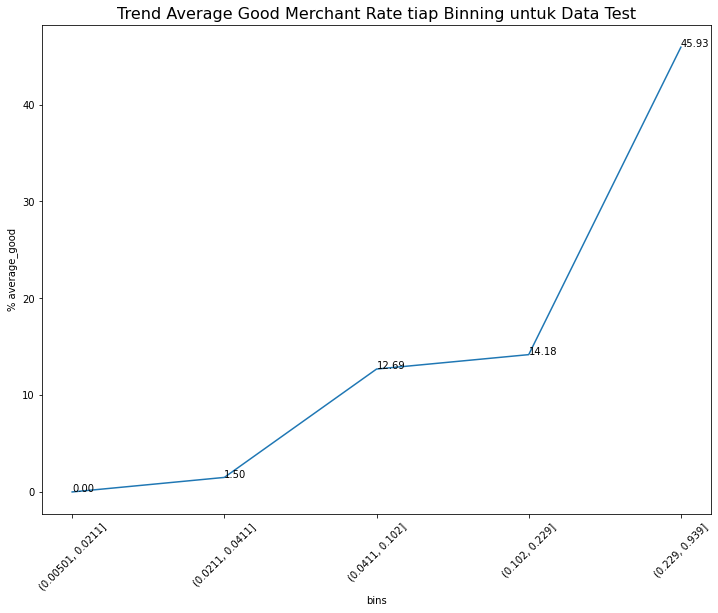

In [183]:
summary2['bins'] = summary2.bins.astype(str)
plt.figure(figsize=(12,9))
sns.lineplot(data = summary2, x='bins', y='pct_good_average')
plt.xticks(rotation=45)
plt.ylabel('% average_good')
plt.title("Trend Average Good Merchant Rate tiap Binning untuk Data Test", size=16)
# label points on the plot
for x, y in zip(summary2['bins'], summary2['pct_good_average']):# the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
             y = y+0.001,
             s = '{:.2f}'.format(y), # data label, formatted to ignore decimals
             color = 'black') # set colour of line# y

In [170]:
data_test_split_proba.groupby(['bins']).agg([len,"sum","mean"])

label               proba                     
                    len sum      mean   len        sum      mean
bins                                                            
(0.00501, 0.0146]    68   0  0.000000  68.0   0.772997  0.011368
(0.0146, 0.0211]     68   0  0.000000  68.0   1.207423  0.017756
(0.0211, 0.0288]     66   1  0.015152  66.0   1.650823  0.025012
(0.0288, 0.0411]     67   1  0.014925  67.0   2.313170  0.034525
(0.0411, 0.0616]     67   6  0.089552  67.0   3.337577  0.049815
(0.0616, 0.102]      67  11  0.164179  67.0   5.287206  0.078914
(0.102, 0.143]       67   7  0.104478  67.0   7.921755  0.118235
(0.143, 0.229]       67  12  0.179104  67.0  12.046729  0.179802
(0.229, 0.416]       67  18  0.268657  67.0  19.566586  0.292039
(0.416, 0.939]       68  44  0.647059  68.0  41.965093  0.617134

# A - Audience (Who We Target ?)

In [137]:
df['Predicted_Resp_Rank'] = np.where(df['p_rank_logreg']>9,'Top 1','Bottom 9')
df['Predicted_Resp_Rank'].value_counts()

Bottom 9    2016
Top 1        224
Name: Predicted_Resp_Rank, dtype: int64

In [138]:
df_top4 = df.loc[df['Predicted_Resp_Rank']=='Top 1',:]
df_top4.shape

(224, 46)

  # P - Prioritization (Based On Business Value and Customer Engagement)

In [139]:
df_top4['spent_cnt'] = np.count_nonzero(df_top4[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],axis=1)
df_top4['spent_cnt'].describe()

count    224.000000
mean       5.602679
std        0.824617
min        3.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spent_cnt, dtype: float64

In [140]:
df_top4['Engagement'] = np.where(df_top4['spent_cnt']<df_top4['spent_cnt'].quantile(0.75),"Low","High")
df_top4['Engagement'].value_counts()

High    171
Low      53
Name: Engagement, dtype: int64

In [141]:
df_top4['Total_Spend'] = df_top4['MntWines']+df_top4['MntFruits']+df_top4['MntMeatProducts'] + \
                         df_top4['MntFishProducts'] + df_top4['MntSweetProducts'] + df_top4['MntGoldProds']

df_top4['Total_Spend'].describe()

count     224.000000
mean     1157.226607
std       634.630630
min        27.000000
25%       605.250000
50%      1187.000000
75%      1689.250000
max      2525.000000
Name: Total_Spend, dtype: float64

In [142]:
df_top4['Spend_Level'] = np.where(df_top4['Total_Spend']<df_top4['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top4['Spend_Level'].value_counts()

Low Spend     168
High Spend     56
Name: Spend_Level, dtype: int64

In [143]:
#membuat tabular spend level dan engagement terhadap response aggregasi mean
pd.crosstab(index=df_top4['Engagement'],columns=df_top4['Spend_Level'],values=df_top4['Response'],aggfunc='mean')

Spend_Level,High Spend,Low Spend
Engagement,,
High,0.640000,0.661157
Low,0.833333,0.574468


In [144]:
#membuat tabular spend level dan engagement terhadap response aggregasi count
pd.crosstab(index=df_top4['Engagement'],columns=df_top4['Spend_Level'],values=df_top4['Response'],aggfunc='count')

Spend_Level,High Spend,Low Spend
Engagement,,
High,50,121
Low,6,47


In [184]:
#prioritas 1
df_priority_1 = df_top4.loc[(df_top4['Spend_Level']=='High Spend')&(df_top4['Engagement']=='Low'),:]
df_priority_1.shape

(6, 50)

In [186]:
#prioritas 2
df_priority_2 = df_top4.loc[(df_top4['Spend_Level']=='Low Spend')&(df_top4['Engagement']=='High'),:]
df_priority_2.shape

(121, 50)

In [187]:
#prioritas 3
df_priority_3 = df_top4.loc[(df_top4['Spend_Level']=='High Spend')&(df_top4['Engagement']=='High'),:]
df_priority_3.shape

(50, 50)

In [188]:
#prioritas 4
df_priority_4 = df_top4.loc[(df_top4['Spend_Level']=='Low Spend')&(df_top4['Engagement']=='Low'),:]
df_priority_4.shape

(47, 50)

# T - Treatment (Identify Service/Product References of Each Priority Segment)

In [149]:
#calculationg Spending Product
spend_cat_priority_1  = df_priority_1[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [150]:
spend_avg = spend_cat_priority_1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            929.3200
MntMeatProducts     672.9800
MntFishProducts     119.3332
MntSweetProducts     81.2644
MntGoldProds         78.6000
MntFruits            71.6000
dtype: float64

In [151]:
#calculationg Spending Product
spend_cat_priority_2  = df_priority_2[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
spend_avg_2 = spend_cat_priority_2.mean(axis=0).sort_values(ascending=False)
spend_avg_2

MntWines            1094.833333
MntMeatProducts      543.666667
MntGoldProds          89.000000
MntFishProducts       51.203333
MntFruits             50.500000
MntSweetProducts       9.500000
dtype: float64

In [152]:
#calculationg Spending Product
spend_cat_priority_3  = df_priority_3[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
spend_avg_3 = spend_cat_priority_3.mean(axis=0).sort_values(ascending=False)
spend_avg_3

MntWines            486.280992
MntMeatProducts     239.256198
MntGoldProds         69.900826
MntFishProducts      61.491240
MntSweetProducts     44.522479
MntFruits            43.743802
dtype: float64

In [153]:
#calculationg Spending Product
spend_cat_priority_4  = df_priority_4[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
spend_avg_4 = spend_cat_priority_4.mean(axis=0).sort_values(ascending=False)
spend_avg_4

MntWines            522.744681
MntMeatProducts     151.255319
MntGoldProds         54.212766
MntFishProducts      14.191489
MntFruits            13.617021
MntSweetProducts     13.404255
dtype: float64

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Tenure', 'year', 'month', 'Age_group',
       'Total_Dependents', 'Income_per_Dependents', 'income_bin',
       'recency_bin', 'wines_bin', 'fruits_bin', 'meat_products',
       'fish_product', 'sweet_product', 'gold_product', 'year_month',
       'Accepted_cmp_previous', 'catalog_purchase', 'deals_purchase', 'proba',
       'p_rank_logreg', 'Predicted_Resp_Rank'],
      dtype='object')

In [189]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [190]:
len(df)

2240